## importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from statistics import mean
from sklearn.model_selection import train_test_split 

## importando dados

In [2]:
dados_backup = pd.read_csv('3.1 loan_data_2007_2014.csv')

C:\Users\beatr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dados = dados_backup.copy()

## explorando dados

In [4]:
pd.options.display.max_columns = None #mostra todas as colunas

In [5]:
dados.head(2)
# dados.tail() - Mostra as ultimas linhas do dataframe

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Pré processamento

### emp_length

In [7]:
dados['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
dados['emp_length_int'] = dados['emp_length'].str.replace('\+ years','')
dados['emp_length_int'] = dados['emp_length_int'].str.replace('< 1 year',str(0))
dados['emp_length_int'] = dados['emp_length_int'].str.replace('n/a',str(0))
dados['emp_length_int'] = dados['emp_length_int'].str.replace(' years','')
dados['emp_length_int'] = dados['emp_length_int'].str.replace(' year','')
dados['emp_length_int'].unique() 

C:\Users\beatr\AppData\Local\Temp/ipykernel_6388/2111339476.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dados['emp_length_int'] = dados['emp_length'].str.replace('\+ years','')


array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [9]:
type(dados['emp_length_int'][0])

str

In [10]:
dados['emp_length_int'] = pd.to_numeric(dados['emp_length_int'])

In [11]:
type(dados['emp_length_int'][0])

numpy.float64

### term

In [12]:
dados['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
dados['term_int'] = dados['term'].str.replace(' ','')
dados['term_int'] = dados['term_int'].str.replace('months','')
dados['term_int'].unique()

array(['36', '60'], dtype=object)

In [14]:
dados['term_int'] = pd.to_numeric(dados['term_int'])

In [15]:
type(dados['term_int'][0])

numpy.int64

In [16]:
dados

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.c

### earliest_cr_line

In [17]:
(dados['earliest_cr_line'])

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [18]:
dados['earliest_cr_line_date'] = pd.to_datetime(dados['earliest_cr_line'],format = '%b-%y')

In [19]:
type(dados['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
pd.to_datetime(date.today()) - dados['earliest_cr_line_date']

0        14055 days
1         8852 days
2         7907 days
3        10007 days
4        10038 days
            ...    
466280    7391 days
466281    9521 days
466282    7877 days
466283    7450 days
466284    8546 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [21]:
dados['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime(date.today()) - dados['earliest_cr_line_date'])/np.timedelta64(1,'M')))

#calcular quantidade de meses do dataset até o mes atual

In [22]:
round(pd.to_numeric((pd.to_datetime('2023-01-01')-pd.to_datetime('2023-03-01'))/np.timedelta64(1,'M')))

#calcular quantidade de meses de quaisquer 2 datas

-2

In [23]:
dados['months_since_earliest_cr_line'].describe()
#descrições estatísticas 

count    466256.000000
mean        306.482430
std          93.974829
min        -545.000000
25%         250.000000
50%         292.000000
75%         352.000000
max         654.000000
Name: months_since_earliest_cr_line, dtype: float64

In [24]:
dados.loc[:,['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']][dados['months_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-470.0
1770,Sep-68,2068-09-01,-542.0
2799,Sep-64,2064-09-01,-494.0
3282,Sep-67,2067-09-01,-530.0
3359,Feb-65,2065-02-01,-499.0
...,...,...,...
464003,Jan-68,2068-01-01,-534.0
464260,Jul-66,2066-07-01,-516.0
465100,Oct-67,2067-10-01,-531.0
465500,Sep-67,2067-09-01,-530.0


In [25]:
ano_base = 1900
dados.loc[dados['earliest_cr_line_date'] > pd.Timestamp.now(), 'earliest_cr_line_date'] -= pd.DateOffset(years = 100) 

In [26]:
dados['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime(date.today()) - dados['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [27]:
dados['months_since_earliest_cr_line'].describe()
    

count    466256.000000
mean        309.491078
std          86.928944
min         140.000000
25%         251.000000
50%         293.000000
75%         352.000000
max         954.000000
Name: months_since_earliest_cr_line, dtype: float64

## issue_d


In [28]:
dados['issue_date'] = pd.to_datetime(dados['issue_d'], format = '%b-%y')


In [29]:
dados['issue_date_months'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')-dados['issue_date'])/np.timedelta64(1,"M")))

In [30]:
dados['issue_date_months'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: issue_date_months, dtype: float64

# Pre processamento - variaveis discretas

In [31]:
#criando variaveis dummies
dados_dummies = [pd.get_dummies(dados['grade'], prefix = 'grade', prefix_sep = ':'),
                 pd.get_dummies(dados['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                 pd.get_dummies(dados['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                 pd.get_dummies(dados['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                 pd.get_dummies(dados['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                 pd.get_dummies(dados['purpose'], prefix = 'purpose', prefix_sep = ':'),
                 pd.get_dummies(dados['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                 pd.get_dummies(dados['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [32]:
#transformando em dataframe
dados_dummies = pd.concat(dados_dummies, axis = 1) 

In [33]:
type(dados_dummies)

pandas.core.frame.DataFrame

In [34]:
dados = pd.concat([dados,dados_dummies], axis = 1)

In [35]:
dados.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

# Missing values

## checking for missing values and clean

In [36]:
pd.options.display.max_rows = None

In [37]:
total_linhas = dados.shape[0]
porc_missing =  (dados.isnull().sum() / total_linhas)*100
porc_missing = porc_missing.sort_values(ascending = False)

In [38]:
porc_missing

open_il_12m                                                        100.000000
all_util                                                           100.000000
annual_inc_joint                                                   100.000000
dti_joint                                                          100.000000
verification_status_joint                                          100.000000
open_acc_6m                                                        100.000000
open_il_6m                                                         100.000000
mths_since_rcnt_il                                                 100.000000
total_bal_il                                                       100.000000
il_util                                                            100.000000
open_rv_12m                                                        100.000000
open_rv_24m                                                        100.000000
max_bal_bc                                                      

In [39]:
dados['total_rev_hi_lim'].fillna(dados['funded_amnt'], inplace = True)

In [40]:
dados['total_rev_hi_lim'].isnull().sum()

0

In [41]:
dados['annual_inc'].isnull().sum()

4

In [42]:
mean_annual_inc =dados['annual_inc'].mean()
dados['annual_inc'].fillna(mean_annual_inc, inplace = True)
dados['annual_inc'].isnull().sum()

0

In [43]:
dados['months_since_earliest_cr_line'].isnull().sum()

29

In [44]:
dados['months_since_earliest_cr_line'].fillna(0,inplace = True)
dados['acc_now_delinq'].fillna(0,inplace = True)
dados['total_acc'].fillna(0,inplace = True)
dados['pub_rec'].fillna(0,inplace = True)
dados['open_acc'].fillna(0,inplace = True)
dados['inq_last_6mths'].fillna(0,inplace = True)
dados['delinq_2yrs'].fillna(0,inplace = True)
dados['emp_length_int'].fillna(0,inplace = True)

In [45]:
total_linhas = dados.shape[0]
porc_missing =  (dados.isnull().sum() / total_linhas)*100
porc_missing = porc_missing.sort_values(ascending = False)
porc_missing

open_acc_6m                                                        100.000000
annual_inc_joint                                                   100.000000
total_cu_tl                                                        100.000000
inq_fi                                                             100.000000
all_util                                                           100.000000
max_bal_bc                                                         100.000000
open_rv_24m                                                        100.000000
open_rv_12m                                                        100.000000
il_util                                                            100.000000
total_bal_il                                                       100.000000
mths_since_rcnt_il                                                 100.000000
open_il_24m                                                        100.000000
open_il_12m                                                     

# PD Model

## Data Preparation


### Dependent Variable

In [46]:
dados['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [47]:
dados['loan_status'].value_counts()/dados['loan_status'].count()*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [48]:
dados['good_bad'] = np.where(dados['loan_status'].isin([
    'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off','Late (31-120 days)' ]),0,1)

In [49]:
dados['good_bad'].value_counts()/dados['good_bad'].count()*100

1    89.069346
0    10.930654
Name: good_bad, dtype: float64

### Independent Variable

### Splitting Data

In [50]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test =  train_test_split(dados.drop('good_bad',axis=1), dados['good_bad'],test_size=0.2,random_state = 42)

In [275]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_train

In [276]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [277]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis = 1)
df1.head()

,grade,good_bad
0,NaN,1.0
1,NaN,0.0
2,NaN,1.0
3,NaN,1.0
4,NaN,1.0


In [278]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [279]:
df1 = df1.iloc[:, [0,1,3]]
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,0,NaN
1,B,0,NaN
2,C,0,NaN
3,D,0,NaN
4,E,0,NaN
5,F,0,NaN
6,G,0,NaN


In [280]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [281]:
df1['n_good'] = df1['prop_good']*df1['n_obs']
df1['n_bad'] = (1-df1['prop_good'])*df1['n_obs']


In [282]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()


In [283]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])


In [284]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)


In [285]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [286]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad'])*df1['WoE']
df1['IV'] = df1['IV'].sum()

### Preprocessing Discrete Variables: Automating Calculations

In [287]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df): 
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1-df['prop_good'])*df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df



In [288]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,A,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,D,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,E,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,G,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Preprocessing Discrete Variables: Visualizing Results

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [290]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('weight of Evidence by '+ df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
       
    

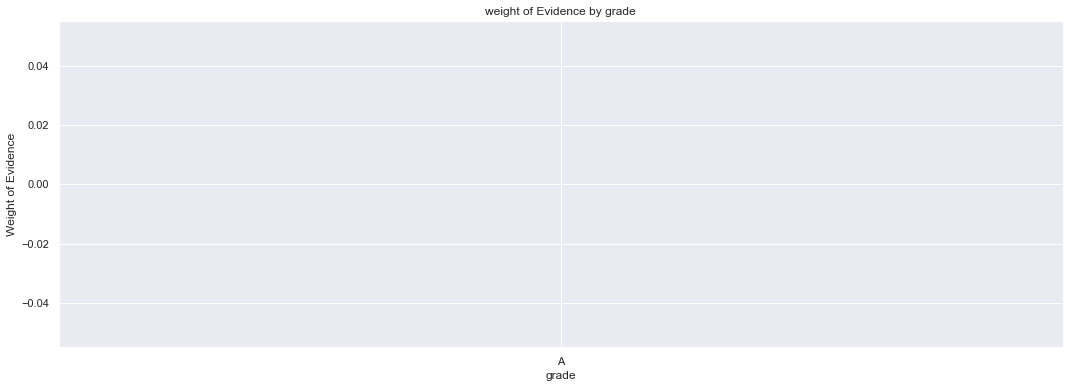

In [291]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables

In [292]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

In [293]:
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,MORTGAGE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NONE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,OTHER,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,OWN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,RENT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


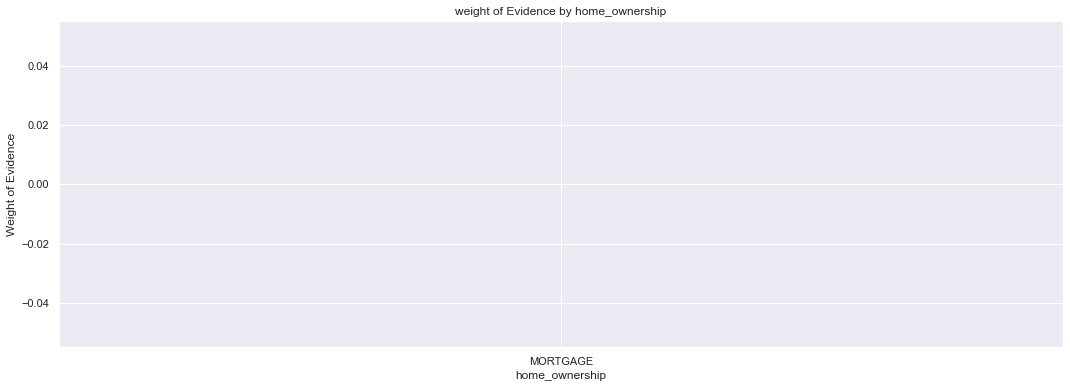

In [294]:
plot_by_woe(df_temp)

In [295]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']]) 

In [296]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [297]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)


In [298]:
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,AK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,AL,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,AR,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,AZ,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,CO,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,CT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,DC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,DE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,FL,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


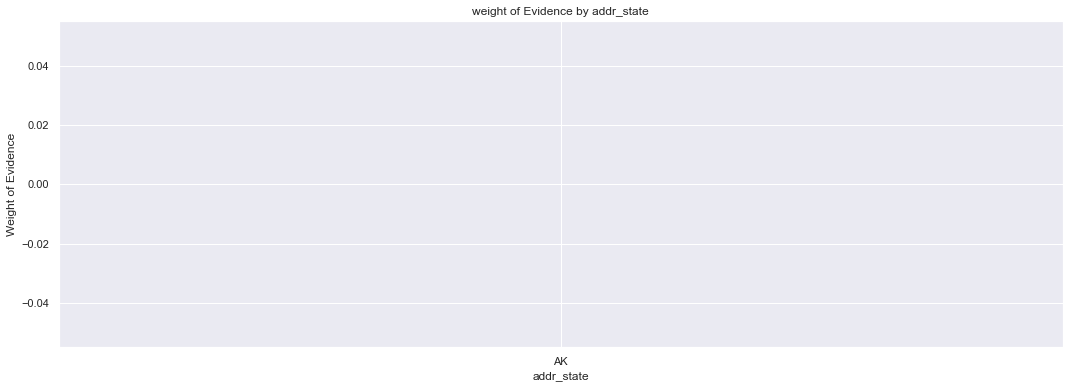

In [299]:
plot_by_woe(df_temp)

In [300]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values: 
    pass
else: 
    df_inputs_prepr['addr_state:ND'] = 0

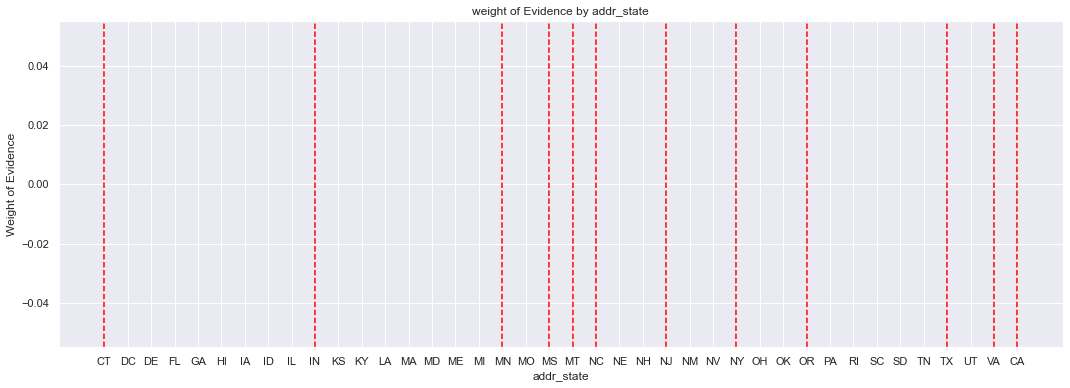

In [301]:


#plot_by_woe(df_temp.iloc[2: -2, :])
plot_by_woe(df_temp.iloc[6: -6, :])



#category_one: states with the highest credit risk borroewrs + one state we have no info (NE,IA,ND,NV,FL,HI,AL)
#category_two: states with low number of observations (WV, NH, WY, DC, ME, ID)
#category_three: states with simmilar WoE and none of them stands out with a particularly high number of borrowers (NM,VA)
plt.axvline('VA', color='red', linestyle='--')
#category_four: state with a high number of borrowers (NY)
plt.axvline('NY', color='red', linestyle='--')
#category_five: states with simmilar WoE and none of them stands out with a particularly high number of borrowers (OK, TN, MO, LA, MD, NC)
plt.axvline('NC', color='red', linestyle='--')
#category_six: state with a high number of borrowers (CA)
plt.axvline('CA', color='red', linestyle='--')
#category_seven: simmilar WoE and none of them stands out with a particularly high number of borrowers (UT,KY,AZ,NJ)
plt.axvline('NJ', color='red', linestyle='--')
#category_eight: simmilar WoE and none of them stands out with a particularly high number of borrowers (AR, MI, PA, OH, MN)
plt.axvline('MN', color='red', linestyle='--')
#category_nine: simmilar WoE and none of them stands out with a particularly high number of borrowers (RI, MA, DE, SD, IN)
plt.axvline('IN', color='red', linestyle='--')
#category_ten: simmilar WoE and none of them stands out with a particularly high number of borrowers (GA, WA, OR)
plt.axvline('OR', color='red', linestyle='--')
#category_eleven: simmilar WoE and none of them stands out with a particularly high number of borrowers (WI, MT)
plt.axvline('MT', color='red', linestyle='--')
#category_twelve: state with a high number of borrowers (TX)
plt.axvline('TX', color='red', linestyle='--')
#category_thirteen: simmilar WoE and none of them stands out with a particularly high number of borrowers (IL, CT)
plt.axvline('CT', color='red', linestyle='--')
#category_fourteen: high WoE but low number of borrowers, witch makes the WoE less reliable (KS, SC, CO, VT, AK, MS)
plt.axvline('MS', color='red', linestyle='--')

In [302]:
#category_one
df_inputs_prepr['addr_state:NE_IA_ND_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:NE'], df_inputs_prepr['addr_state:IA'],
                                                          df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

#category_two
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

#category_three
df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

#category_five
df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

#category_seven
df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                                      df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

#category_eight
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                                    df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:MN']])

#category_nine: 
df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                                    df_inputs_prepr['addr_state:IN']])

#category_ten:
df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                                    df_inputs_prepr['addr_state:OR']])

#category_eleven:
df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

#category_thirteen:
df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

#category_fourteen:
df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                                            df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                                            df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])



In [303]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Not Verified,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Source Verified,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Verified,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


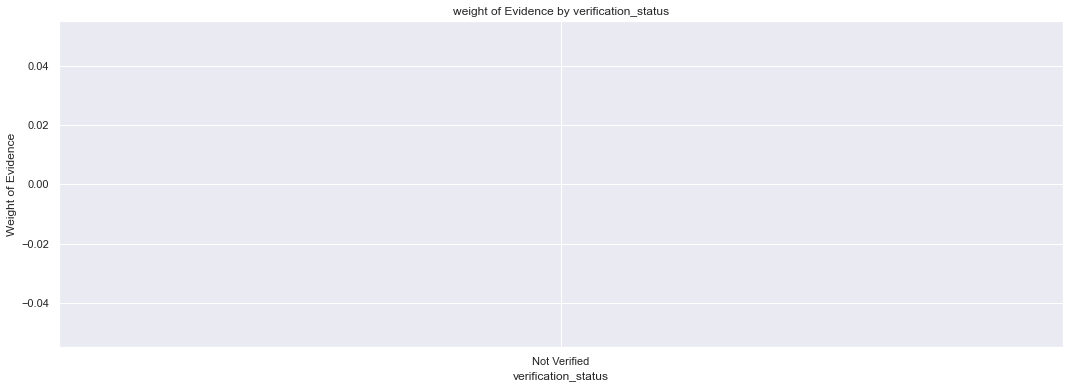

In [304]:
plot_by_woe(df_temp)

In [305]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,car,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,credit_card,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,debt_consolidation,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,educational,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,home_improvement,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,house,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,major_purchase,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,medical,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,moving,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,other,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


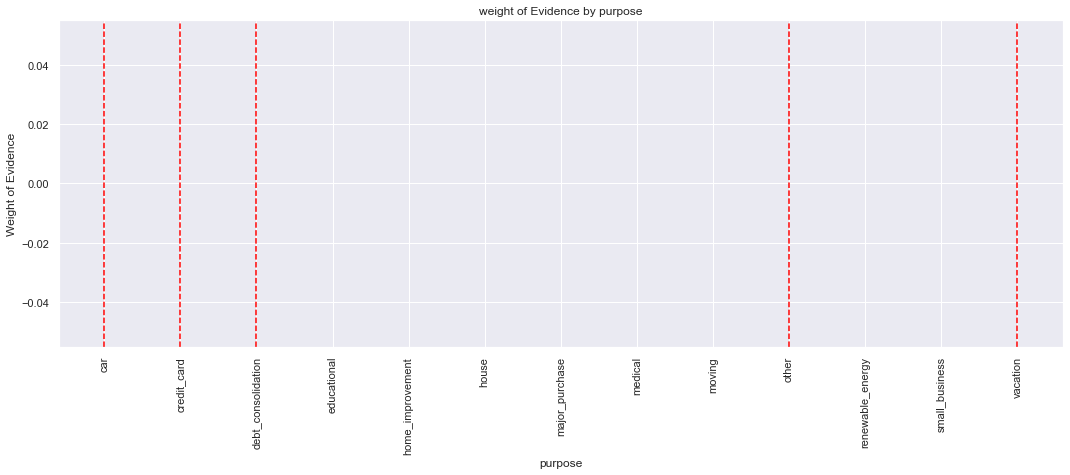

In [306]:
plot_by_woe(df_temp,90)
#category_1: small_business, educational, moving, house, other
plt.axvline('other', color = 'red', linestyle = '--')
#category_2: renewable_energy, medical, wedding, vacation
plt.axvline('vacation', color = 'red', linestyle = '--')
#category_3: debt_consolidation
plt.axvline('debt_consolidation', color = 'red', linestyle = '--')
#category_4: home_improvement, major_purchase, car
plt.axvline('car', color = 'red', linestyle = '--')
#category_5: credit_card
plt.axvline('credit_card', color = 'red', linestyle = '--')

In [307]:
#category_1:
df_inputs_prepr['purpose:SBu_Edu_Mov_Hou_Oth'] = sum([df_inputs_prepr['purpose:small_business'], df_inputs_prepr['purpose:educational'],
                                                      df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house'],
                                                      df_inputs_prepr['purpose:other']])

#category_2:
df_inputs_prepr['purpose:REn_Med_Wed_Vac'] = sum([df_inputs_prepr['purpose:renewable_energy'], df_inputs_prepr['purpose:medical'],
                                                  df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:vacation']])

#category_4:
df_inputs_prepr['purpose:HomeIm_MajPur_Car'] = sum([df_inputs_prepr['purpose:home_improvement'], df_inputs_prepr['purpose:major_purchase'],
                                                  df_inputs_prepr['purpose:car']])


In [308]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,w,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## Preprocessing Continuous Variables: Creating Dummy Variables 

In [309]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df): 
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1-df['prop_good'])*df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [310]:
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [311]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,60.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


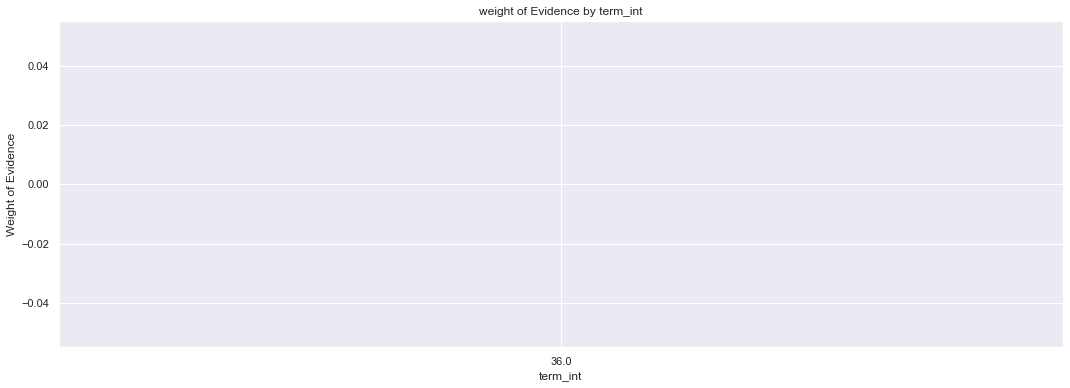

In [312]:
plot_by_woe(df_temp)

In [313]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [314]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [315]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,8.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,9.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


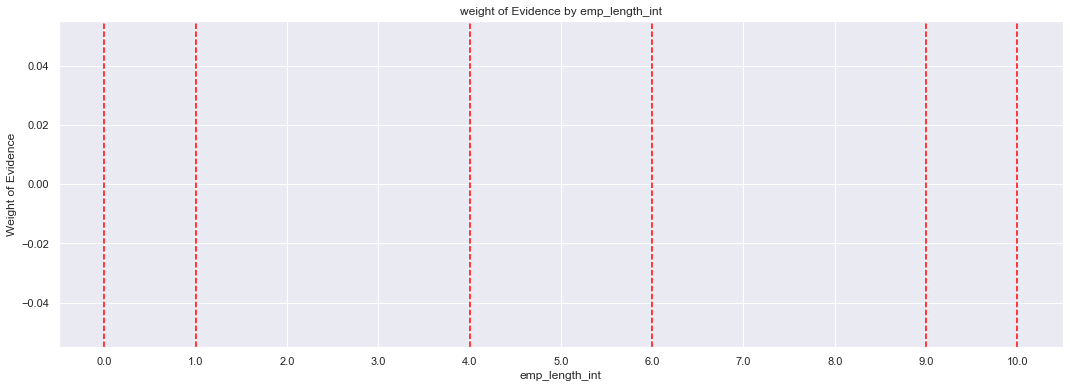

In [316]:
plot_by_woe(df_temp)
plt.axvline(0, color = 'red', linestyle = '--')
plt.axvline(1, color = 'red', linestyle = '--')
plt.axvline(4, color = 'red', linestyle = '--')
plt.axvline(6, color = 'red', linestyle = '--')
plt.axvline(9, color = 'red', linestyle = '--')
plt.axvline(10, color = 'red', linestyle = '--')

In [317]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [318]:
df_inputs_prepr['issue_date_months'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [319]:
df_inputs_prepr['issue_date_months_factor'] = pd.cut(df_inputs_prepr['issue_date_months'],50)


In [320]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'issue_date_months_factor', df_targets_prepr)
df_temp

,issue_date_months_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(37.8, 39.6]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(39.6, 41.4]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(41.4, 43.2]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(43.2, 45.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(45.0, 46.8]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(46.8, 48.6]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(48.6, 50.4]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(50.4, 52.2]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(52.2, 54.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


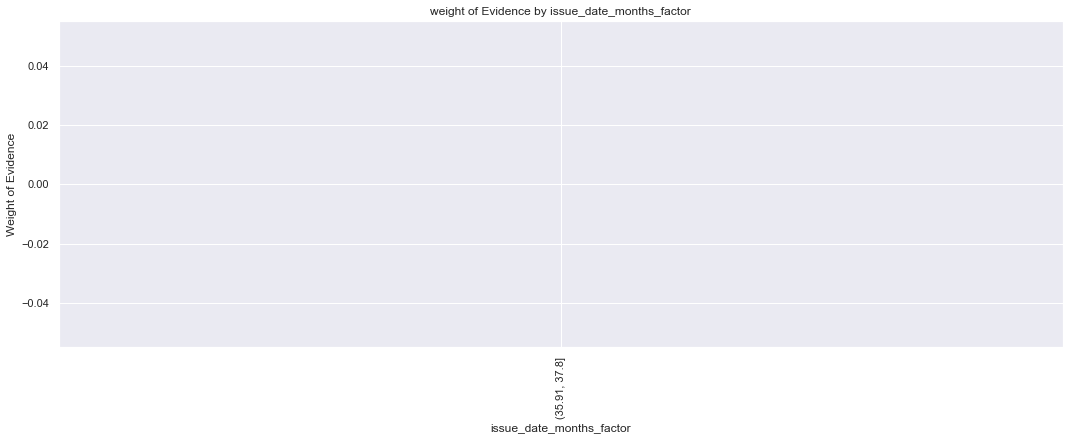

In [321]:
plot_by_woe(df_temp, 90)


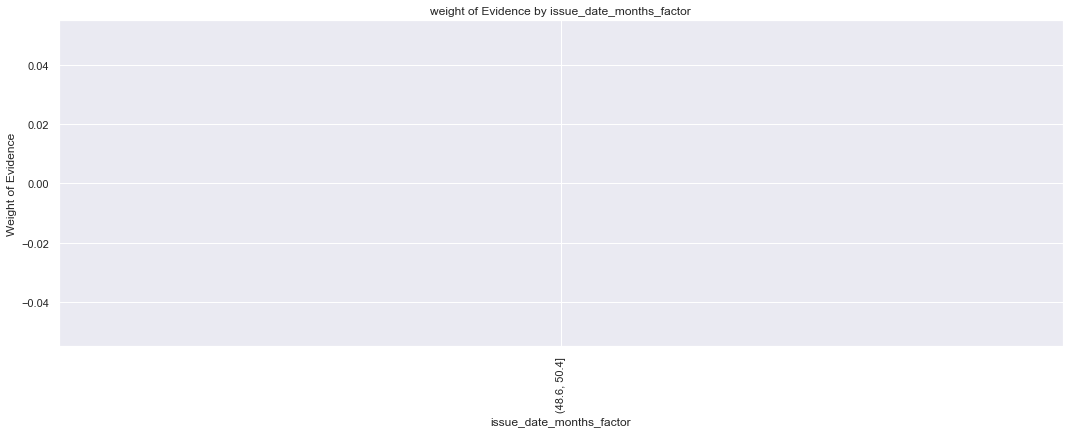

In [322]:
plot_by_woe(df_temp.iloc[7:,:], 90)

In [323]:
df_inputs_prepr['issue_date_months:<38'] = np.where(df_inputs_prepr['issue_date_months'].isin(range(38)),1,0)
df_inputs_prepr['issue_date_months:38-39'] = np.where(df_inputs_prepr['issue_date_months'].isin(range(38,40)),1,0)
df_inputs_prepr['issue_date_months:40-41'] = np.where(df_inputs_prepr['issue_date_months'].isin(range(40,42)),1,0)
df_inputs_prepr['issue_date_months:42-48'] = np.where(df_inputs_prepr['issue_date_months'].isin(range(42,49)),1,0)
df_inputs_prepr['issue_date_months:49-52'] = np.where(df_inputs_prepr['issue_date_months'].isin(range(49,53)),1,0)
df_inputs_prepr['issue_date_months:53-64'] = np.where(df_inputs_prepr['issue_date_months'].isin(range(53,65)),1,0)
df_inputs_prepr['issue_date_months:65-84'] = np.where(df_inputs_prepr['issue_date_months'].isin(range(65,85)),1,0)
df_inputs_prepr['issue_date_months:>84'] = np.where(df_inputs_prepr['issue_date_months'].isin(range(85,int(df_inputs_prepr['issue_date_months'].max()))),1,0)

In [324]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [325]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp 

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(5.833, 6.246]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(6.246, 6.658]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(6.658, 7.071]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(7.071, 7.484]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(7.484, 7.897]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(7.897, 8.31]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(8.31, 8.722]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(8.722, 9.135]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(9.135, 9.548]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


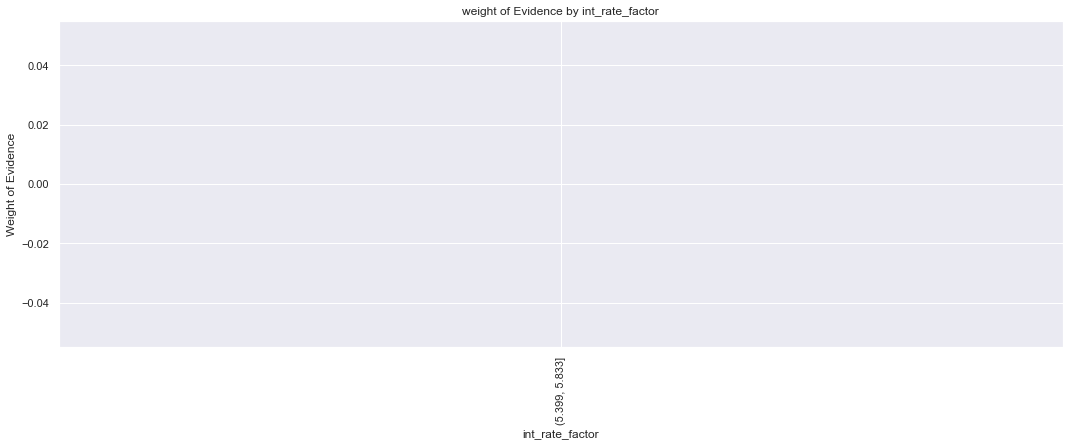

In [326]:
plot_by_woe(df_temp, 90)

In [327]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate']<= 12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate']<= 15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate']<= 20.281),1,0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] >20.281),1,0)

In [328]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'],50)

In [329]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,"(1190.0, 1880.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(1880.0, 2570.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(2570.0, 3260.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(3260.0, 3950.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(3950.0, 4640.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(4640.0, 5330.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(5330.0, 6020.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(6020.0, 6710.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(6710.0, 7400.0]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


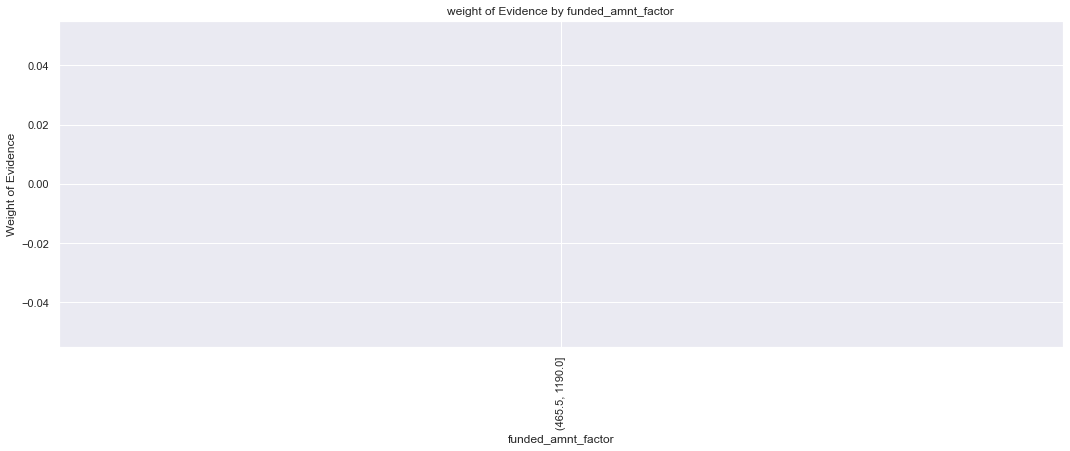

In [330]:
plot_by_woe(df_temp, 90)

In [331]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['months_since_earliest_cr_line'].max()))), 1, 0)


In [332]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [333]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [334]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [335]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [336]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [337]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [338]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [339]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [340]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [341]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [342]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

## Preprocessing the Test Dataset

In [345]:
 #loan_data_inputs_train = df_inputs_prepr
#loan_data_inputs_test = df_inputs_prepr

In [347]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')

In [348]:
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')